In [55]:
# Importando as bibliotecas
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import datetime
%matplotlib inline

In [63]:
import warnings
warnings.filterwarnings("ignore")

In [36]:
# Criando um ticker
ticker = yf.Ticker('PBR')

In [37]:
# Definindo o periodo de observação das cotações
data = ticker.history(period='7d', interval='1m').reset_index() # Periodo de 7 dias num intervlo de 1 minuto.

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Datetime      2730 non-null   datetime64[ns, America/New_York]
 1   Open          2730 non-null   float64                         
 2   High          2730 non-null   float64                         
 3   Low           2730 non-null   float64                         
 4   Close         2730 non-null   float64                         
 5   Volume        2730 non-null   int64                           
 6   Dividends     2730 non-null   int64                           
 7   Stock Splits  2730 non-null   int64                           
dtypes: datetime64[ns, America/New_York](1), float64(4), int64(3)
memory usage: 170.8 KB


In [12]:
# Exibindo os dados 
data

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-06-02 09:30:00-04:00,10.5200,10.550,10.5100,10.5450,538859,0,0
1,2021-06-02 09:31:00-04:00,10.5485,10.565,10.5200,10.5600,255297,0,0
2,2021-06-02 09:32:00-04:00,10.5600,10.580,10.5595,10.5700,71766,0,0
3,2021-06-02 09:33:00-04:00,10.5800,10.615,10.5800,10.6103,222987,0,0
4,2021-06-02 09:34:00-04:00,10.6200,10.620,10.5800,10.5870,106390,0,0
...,...,...,...,...,...,...,...,...
2720,2021-06-10 15:51:00-04:00,11.7050,11.710,11.7000,11.7050,89373,0,0
2721,2021-06-10 15:52:00-04:00,11.7050,11.710,11.7000,11.7050,47168,0,0
2722,2021-06-10 15:53:00-04:00,11.7050,11.710,11.7000,11.7050,66840,0,0
2723,2021-06-10 15:54:00-04:00,11.7100,11.710,11.6750,11.6750,526373,0,0


In [19]:
# Criando um intervalo específico de observação
start ='2021-06-05'
end = '2021-06-10'
ticker.history(interval='1m', start = start, end = end).reset_index()

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-06-07 09:30:00-04:00,11.4185,11.4300,11.340,11.4185,954790,0,0
1,2021-06-07 09:31:00-04:00,11.4100,11.4150,11.385,11.3850,242666,0,0
2,2021-06-07 09:32:00-04:00,11.3850,11.3878,11.360,11.3650,195725,0,0
3,2021-06-07 09:33:00-04:00,11.3650,11.3700,11.350,11.3700,36752,0,0
4,2021-06-07 09:34:00-04:00,11.3600,11.3600,11.340,11.3450,83202,0,0
...,...,...,...,...,...,...,...,...
1165,2021-06-09 15:55:00-04:00,11.6950,11.7200,11.690,11.7100,1394164,0,0
1166,2021-06-09 15:56:00-04:00,11.7150,11.7270,11.710,11.7150,510233,0,0
1167,2021-06-09 15:57:00-04:00,11.7150,11.7200,11.690,11.6950,436222,0,0
1168,2021-06-09 15:58:00-04:00,11.6959,11.7100,11.690,11.7050,465672,0,0


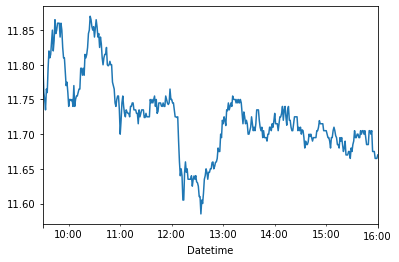

In [18]:
# Variação do valor da ação no fechamento
start ='2021-06-03'
end = '2021-06-10'
ticker.history(period='1w', interval='1m')['Close'].plot();

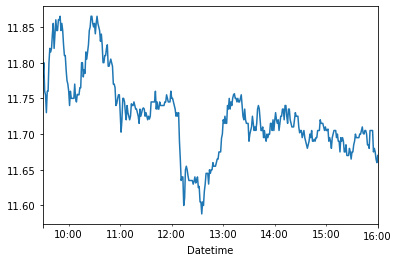

In [53]:
# Variação do valor da ação na abertura
start ='2021-06-03'
end = '2021-06-10'
ticker.history(period='1w', interval='1m')['Open'].plot();

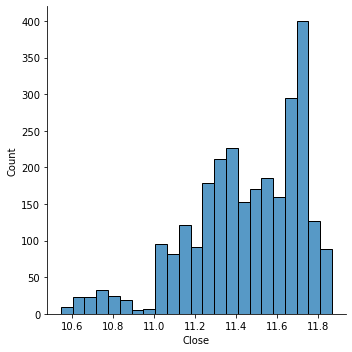

In [54]:
# Distribuição da frequência  do valor das ações no fechamento
sns.displot(data, x = 'Close')

In [56]:
#criando novos campos de medias móveis
data['mm10d'] = data['Close'].rolling(10).mean()
data['mm20d'] = data['Close'].rolling(20).mean()

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Datetime      2730 non-null   datetime64[ns, America/New_York]
 1   Open          2730 non-null   float64                         
 2   High          2730 non-null   float64                         
 3   Low           2730 non-null   float64                         
 4   Close         2730 non-null   float64                         
 5   Volume        2730 non-null   int64                           
 6   Dividends     2730 non-null   int64                           
 7   Stock Splits  2730 non-null   int64                           
 8   mm10d         2721 non-null   float64                         
 9   mm20d         2711 non-null   float64                         
dtypes: datetime64[ns, America/New_York](1), float64(6), int64(3)
memory usag

In [58]:
#Empurrando para frente os valores das ações
data['Close'] = data['Close'].shift(-1)

data.head()

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits,mm10d,mm20d
0,2021-06-02 09:30:00-04:00,10.5200,10.550,10.5100,10.5600,538859,0,0,NaN,NaN
1,2021-06-02 09:31:00-04:00,10.5485,10.565,10.5200,10.5700,255297,0,0,NaN,NaN
2,2021-06-02 09:32:00-04:00,10.5600,10.580,10.5595,10.6103,71766,0,0,NaN,NaN
3,2021-06-02 09:33:00-04:00,10.5800,10.615,10.5800,10.5870,222987,0,0,NaN,NaN
4,2021-06-02 09:34:00-04:00,10.6200,10.620,10.5800,10.5900,106390,0,0,NaN,NaN


In [59]:
data.dropna(inplace=True)
data

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits,mm10d,mm20d
19,2021-06-02 09:49:00-04:00,10.615,10.650,10.615,10.6350,143484,0,0,10.61829,10.60101
20,2021-06-02 09:50:00-04:00,10.640,10.645,10.630,10.6300,95757,0,0,10.62164,10.60551
21,2021-06-02 09:51:00-04:00,10.630,10.635,10.620,10.6350,344963,0,0,10.62414,10.60901
22,2021-06-02 09:52:00-04:00,10.630,10.640,10.620,10.6273,59918,0,0,10.62650,10.61226
23,2021-06-02 09:53:00-04:00,10.630,10.640,10.625,10.6350,99864,0,0,10.62623,10.61311
...,...,...,...,...,...,...,...,...,...,...
2724,2021-06-10 15:55:00-04:00,11.675,11.680,11.670,11.6750,158629,0,0,11.69150,11.69625
2725,2021-06-10 15:56:00-04:00,11.680,11.680,11.670,11.6650,27594,0,0,11.68950,11.69500
2726,2021-06-10 15:57:00-04:00,11.675,11.680,11.660,11.6650,236675,0,0,11.68750,11.69325
2727,2021-06-10 15:58:00-04:00,11.665,11.670,11.660,11.6650,110182,0,0,11.68550,11.69175


In [61]:
#verificando quantidade de linhas
qtd_linhas = len(data)

qtd_linhas_treino= round(.70 * qtd_linhas)
qtd_linhas_teste= qtd_linhas - qtd_linhas_treino  
qtd_linhas_validacao = qtd_linhas -1

info = (
    f"linhas treino= 0:{qtd_linhas_treino}"
    f" linhas teste= {qtd_linhas_treino}:{qtd_linhas_treino + qtd_linhas_teste -1}"
    f" linhas validação= {qtd_linhas_validacao}"
)

info

'linhas treino= 0:1897 linhas teste= 1897:2709 linhas validação= 2709'

In [62]:
#separando as features e labels
features = data.drop(['Datetime','Close'], 1)
labels = data['Close']

In [64]:
#Escolhendo as melhores features com Kbest

features_list = ('Open','High','Low','Volume','Dividends','Stock Splits','mm10d','mm20d')

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, labels)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print ('')
print ("Melhores features:")
print (k_best_features_final)


Melhores features:
{'mm10d': nan, 'Stock Splits': nan, 'Low': 2185.6545778420555, 'Volume': 2120.7667254699095, 'High': 1650.5232456339886, 'mm20d': 728.161253777659, 'Dividends': 0.3670644344388379}


In [66]:
#separando as features escolhidas
features = data.loc[:,['Low','Volume','High','mm20d']]

In [67]:
#Separa os dados de treino teste e validação
X_train = features[:qtd_linhas_treino]
X_test = features[qtd_linhas_treino:qtd_linhas_treino + qtd_linhas_teste -1]

y_train = labels[:qtd_linhas_treino]
y_test = labels[qtd_linhas_treino:qtd_linhas_treino + qtd_linhas_teste -1]

print( len(X_train), len(y_train))

print( len(X_test), len(y_test))

1897 1897
812 812


In [68]:
# Normalizando os dados de entrada(features)
# Gerando o novo padrão
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)  # Normalizando os dados de entrada(treinamento)
X_test_scale  = scaler.transform(X_test)       # Normalizando os dados de entrada(teste)

In [69]:
#treinamento usando regressão linear
lr = linear_model.LinearRegression()
lr.fit(X_train_scale, y_train)
pred= lr.predict(X_test_scale)
cd =r2_score(y_test, pred)

f'Coeficiente de determinação:{cd * 100:.2f}'

'Coeficiente de determinação:95.62'

In [77]:
#rede neural com ajuste hyper parameters

rn = MLPRegressor()

parameter_space = {
        'hidden_layer_sizes': [(i,) for i in list(range(1, 21))],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam', 'lbfgs'], 
        'alpha': [0.0001, 0.05],
        'learning_rate': ['constant', 'adaptive'],
    }

search = GridSearchCV(rn, parameter_space, n_jobs=-1, cv=5)


search.fit(X_train_scale,y_train)
clf = search.best_estimator_
preds= search.predict(X_test_scale)

cd = search.score(X_test_scale, y_test)

f'Coeficiente de determinação:{cd * 100:.2f}'

'Coeficiente de determinação:95.01'

In [71]:
valor_novo = features.tail(1)
valor_novo

,Low,Volume,High,mm20d
2728,11.66,290138,11.67,11.69025


In [72]:
previsao=scaler.transform(valor_novo)


pred=lr.predict(previsao)

pred

array([11.66314584])

In [74]:
data_pregao_full=data['Datetime']
data_pregao=data_pregao_full.tail(1)

res_full=data['Close']
res=res_full.tail(1)

df=pd.DataFrame({'data_pregao':data_pregao, 'real':res, 'previsao':pred})


df.set_index('data_pregao', inplace=True)

print(df)

                            real   previsao
data_pregao                                
2021-06-10 15:59:00-04:00  11.67  11.663146


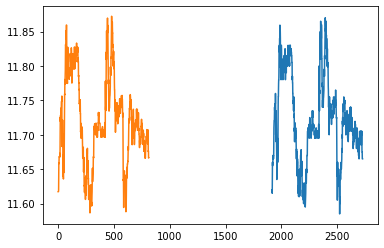

In [99]:
plt.plot( y_test)
plt.plot(preds)